In [1]:
from langchain_community.chat_models import ChatOllama
from langchain_core.output_parsers import StrOutputParser
import pandas as pd

In [2]:
df = pd.read_csv('/Users/flo/Documents/projet_NLP/generated_questions.csv')


In [3]:
df.describe()

,input,category,Sales,Maintenance,Inventory Management,Input
count,317,318,1,1,1,1
unique,296,3,1,1,1,1
top,Which sales representative achieved the highes...,Sales,{'input': 'Who were the top salespersons of th...,{'input': 'What is the maintenance cost for th...,"{'input': ""Is there any item that hasn't been ...",Which sales representative achieved the highes...
freq,5,106,1,1,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   input                 317 non-null    object
 1   category              318 non-null    object
 2   Sales                 1 non-null      object
 3   Maintenance           1 non-null      object
 4   Inventory Management  1 non-null      object
 5   Input                 1 non-null      object
dtypes: object(6)
memory usage: 15.2+ KB


In [5]:
# Filter the DataFrame to keep only rows where both 'input' and 'category' are not null
filtered_df = df.dropna(subset=['input', 'category'])
clean_df = filtered_df.iloc[:, :2]

# Removing rows where 'input' values are not unique
filtered_df_unique = filtered_df[filtered_df.duplicated(subset=['input'], keep=False) == False]

# filter columns
clean_df = filtered_df_unique.iloc[:, :2].reset_index(drop=True)

In [6]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   input     281 non-null    object
 1   category  281 non-null    object
dtypes: object(2)
memory usage: 4.5+ KB


In [7]:
clean_df.describe()

,input,category
count,281,281
unique,281,3
top,Which customer made the highest purchase this ...,Inventory Management
freq,1,100


### Data Analysis :

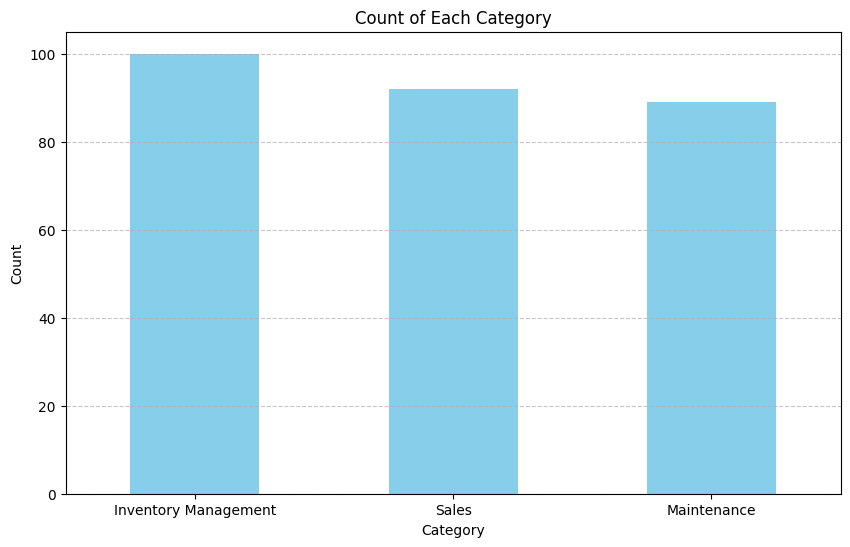

In [8]:
import matplotlib.pyplot as plt

# Count the occurrences of each category
category_counts = clean_df['category'].value_counts()

# Plot the counts of each category
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Each Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Evaluate each methods with llama3, mistral and phi-3 :

In [9]:
from few_shot import few_shot_method
from one_shot import one_shot_method
from zero_shot import zero_shot_method

In [10]:
clean_df.head()

,input,category
0,Which customer made the highest purchase this ...,Sales
1,How many units were sent for repair this month?,Maintenance
2,What was the most frequently ordered product l...,Inventory Management
3,Which sales representative has the highest sal...,Sales
4,How many scheduled maintenance activities are ...,Maintenance


In [11]:
from distutils.command import clean


list_of_methods = ['few_shot', 'one_shot', 'zero_shot']

# Initialisation de combined_df avec le même index que clean_df
combined_df = pd.DataFrame()

for idx in range(len(clean_df)):
    print(f'Processing row {idx}...')
    combined_row = pd.DataFrame()
    input_text = clean_df.loc[idx, 'input']
    method_line = pd.DataFrame()
    for method in list_of_methods:
        if method == 'few_shot':
            type_df = few_shot_method(input_text)
        elif method == 'one_shot':
            type_df = one_shot_method(input_text)
        elif method == 'zero_shot':
            type_df = zero_shot_method(input_text)
        method_line = pd.concat([method_line, type_df], axis=1)
    # Changer l'indice de type_df pour correspondre à l'indice de clean_df
    method_line.index = [idx]
    
    # Concaténer les résultats avec la ligne actuelle de clean_df
    combined_row = pd.concat([clean_df.loc[[idx]], method_line], axis=1)
    combined_df = pd.concat([combined_df, combined_row], axis=0)

combined_df.head()

Processing row 0...
Processing row 1...
Processing row 2...
Processing row 3...
Processing row 4...
Processing row 5...
Processing row 6...
Processing row 7...
Processing row 8...
Processing row 9...
Processing row 10...
Processing row 11...
Processing row 12...
Processing row 13...
Processing row 14...
Processing row 15...
Processing row 16...
Processing row 17...
Processing row 18...
Processing row 19...
Processing row 20...
Processing row 21...
Processing row 22...
Processing row 23...
Processing row 24...
Processing row 25...
Processing row 26...
Processing row 27...
Processing row 28...
Processing row 29...
Processing row 30...
Processing row 31...
Processing row 32...
Processing row 33...
Processing row 34...
Processing row 35...
Processing row 36...
Processing row 37...
Processing row 38...
Processing row 39...
Processing row 40...
Processing row 41...
Processing row 42...
Processing row 43...
Processing row 44...
Processing row 45...
Processing row 46...
Processing row 47...
Pr

,input,category,"(FEW_SHOT, llama3:latest)","(FEW_SHOT, mistral:latest)","(FEW_SHOT, phi3:latest)","(ONE_SHOT, llama3:latest)","(ONE_SHOT, mistral:latest)","(ONE_SHOT, phi3:latest)","(ZERO_SHOT, llama3:latest)","(ZERO_SHOT, mistral:latest)","(ZERO_SHOT, phi3:latest)"
0,Which customer made the highest purchase this ...,Sales,Sales,Sales,Sales,Sales,Sales,Sales,Sales,Sales,Sales
1,How many units were sent for repair this month?,Maintenance,Maintenance,Maintenance,Maintenance,Maintenance,Maintenance,Maintenance,Maintenance,Maintenance,Maintenance
2,What was the most frequently ordered product l...,Inventory Management,Inventory Management,Inventory Management,Sales,Inventory Management,Inventory Management,Sales,Sales,Inventory Management,Sales
3,Which sales representative has the highest sal...,Sales,Sales,Sales,Sales,Sales,Sales,Sales,Sales,Sales,Sales
4,How many scheduled maintenance activities are ...,Maintenance,Maintenance,Maintenance,Maintenance,Maintenance,Maintenance,Maintenance,Maintenance,Maintenance,Maintenance


In [12]:
combined_df.to_csv('Eval_combined_df.csv')